In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.preprocessing import image

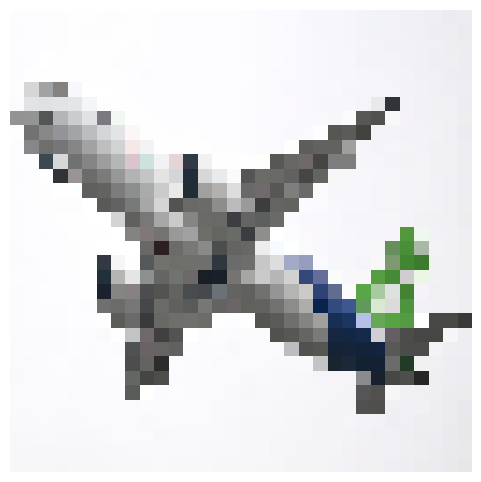

In [26]:
# Load the image to classify
img_path = 'drive/MyDrive/DeepDying/dis_is_airplane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(img)
plt.show()

In [27]:
# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32') / 255.0
img_array

array([[[[0.99215686, 0.9882353 , 1.        ],
         [0.99215686, 0.99215686, 1.        ],
         [0.99215686, 0.99215686, 1.        ],
         ...,
         [0.93333334, 0.9372549 , 0.9529412 ],
         [0.92156863, 0.9254902 , 0.9411765 ],
         [0.9254902 , 0.92941177, 0.94509804]],

        [[0.9882353 , 0.9882353 , 0.99607843],
         [0.99215686, 0.99215686, 1.        ],
         [0.99215686, 0.99215686, 1.        ],
         ...,
         [0.93333334, 0.92941177, 0.9490196 ],
         [0.93333334, 0.92941177, 0.9490196 ],
         [0.92156863, 0.91764706, 0.9372549 ]],

        [[0.99215686, 0.99215686, 1.        ],
         [0.99215686, 0.99215686, 1.        ],
         [0.99215686, 0.99215686, 1.        ],
         ...,
         [0.9411765 , 0.9372549 , 0.95686275],
         [0.93333334, 0.92941177, 0.9490196 ],
         [0.92941177, 0.92941177, 0.9372549 ]],

        ...,

        [[0.972549  , 0.972549  , 0.98039216],
         [0.972549  , 0.96862745, 0.9882353 ]

In [28]:
# Load untrained MobileNet model
wl_model = tf.keras.models.load_model('drive/MyDrive/DeepDying/wl_mobilenet_model.h5')
wl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)        128   

In [29]:
# Load MobileNet model pre-trained on ImageNet data
pr_model = tf.keras.models.load_model('drive/MyDrive/DeepDying/pr_mobilenet_model.h5')
pr_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)        128 

In [30]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [37]:
# Make predictions on wl_model
predictions = wl_model.predict(img_array)
predicted_class = sorted(range(len(predictions[0])), key=lambda k: predictions[0][k], reverse=True)

# Print the predicted class and probability
for i in range(len(class_names)):
  print(f"Predicted class: {class_names[predicted_class[i]]}, score: {predictions[0][predicted_class[i]]*100:2f}%")

1/1 [==============================] - 0s 23ms/step
Predicted class: airplane, score: 99.939501%
Predicted class: horse, score: 0.052574%
Predicted class: bird, score: 0.007598%
Predicted class: ship, score: 0.000172%
Predicted class: cat, score: 0.000145%
Predicted class: deer, score: 0.000010%
Predicted class: dog, score: 0.000001%
Predicted class: truck, score: 0.000001%
Predicted class: frog, score: 0.000000%
Predicted class: automobile, score: 0.000000%


In [36]:
# Make predictions on pretrained_model
predictions = pr_model.predict(img_array)
predicted_class = sorted(range(len(predictions[0])), key=lambda k: predictions[0][k], reverse=True)

# Print the predicted class and probability
for i in range(len(class_names)):
  print(f"Predicted class: {class_names[predicted_class[i]]}, score: {predictions[0][predicted_class[i]]*100:2f}%")

1/1 [==============================] - 0s 36ms/step
Predicted class: airplane, score: 99.353856%
Predicted class: deer, score: 0.282742%
Predicted class: bird, score: 0.151999%
Predicted class: truck, score: 0.065409%
Predicted class: horse, score: 0.045953%
Predicted class: ship, score: 0.028773%
Predicted class: automobile, score: 0.027289%
Predicted class: dog, score: 0.025848%
Predicted class: cat, score: 0.015308%
Predicted class: frog, score: 0.002829%
